# Requirements

In [93]:
import pandas as pd

In [94]:
# Add as many imports as you need.

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **average sea-level pressure** in the city of Skopje. Your task involves employing bagging and boosting methods to forecast the average sea-level pressure. To accomplish this, you will use data from the preceding three days, consisting of average, minimal, and maximal temperatures, precipitation, as well as wind direction and speed, and the current season. By applying these ensemble learning techniques, you aim to enhance the accuracy and reliability of your predictions, gaining valuable insights into the temporal dynamics of sea-level pressure based on the given meteorological variables.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Weather Dataset

## Downloading the Weather Dataset

In [96]:
!gdown 1F8hSJgpOTdoe9rhFj6DYiwmPZ5hJ-ubI # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1F8hSJgpOTdoe9rhFj6DYiwmPZ5hJ-ubI
To: /content/weather.csv
100% 63.3k/63.3k [00:00<00:00, 64.1MB/s]


## Exploring the Weather Dataset
This dataset consits of daily weather records for the city of Skopje from January 1, 2021, to August 1, 2023. Each entry includes a unique station ID, city name, date, corresponding season (e.g., summer, winter), and various meteorological parameters such as average, minimum, and maximum temperatures in Celsius, precipitation in millimeters, average wind direction in degrees, average wind speed in kilometers per hour, and average sea-level pressure in hectopascals. The dataset offers comprehensive insights into the climatic conditions, allowing for analysis and exploration of weather patterns in Skopje over the specified time period.

The dataset comprises the following columns:
- station_id - unique ID for the weather station,
- city_name - name of the city where the station is located,
- date - date of the weather record,
- season - season corresponding to the date (e.g., summer, winter),
- avg_temp_c - average temperature in Celsius,
- min_temp_c - minimum temperature in Celsius,
- max_temp_c - maximum temperature in Celsius,
- precipitation_mm - precipitation in millimeters,
- avg_wind_dir_deg - average wind direction in degrees,
- avg_wind_speed_kmh - average wind speed in kilometers per hour, and
- avg_sea_level_pres_hpa - average sea-level pressure in hectopascals.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [97]:
# Write your code here. Add as many boxes as you need.
import numpy as np
import pandas as pd

data = pd.read_csv('/content/weather.csv')

In [98]:
data

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,13588,Skopje,2021-01-01,Winter,5.1,0.5,13.2,0.0,330.0,5.9,1021.2
1,13588,Skopje,2021-01-02,Winter,3.0,-2.6,11.2,0.0,330.0,5.9,1021.2
2,13588,Skopje,2021-01-03,Winter,6.8,3.5,12.5,1.3,339.0,8.0,1017.8
3,13588,Skopje,2021-01-04,Winter,6.6,6.1,7.2,3.6,298.0,5.3,1011.3
4,13588,Skopje,2021-01-05,Winter,4.3,2.3,6.7,4.6,11.0,5.1,1014.5
...,...,...,...,...,...,...,...,...,...,...,...
938,13588,Skopje,2023-07-28,Summer,22.8,12.3,32.7,0.0,2.0,6.8,1014.6
939,13588,Skopje,2023-07-29,Summer,26.3,16.3,35.4,0.0,261.0,6.2,1011.7
940,13588,Skopje,2023-07-30,Summer,28.2,19.5,36.4,0.0,317.0,8.0,1009.8
941,13588,Skopje,2023-07-31,Summer,25.8,20.9,32.1,0.0,307.0,12.3,1010.9


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   station_id              943 non-null    int64  
 1   city_name               943 non-null    object 
 2   date                    943 non-null    object 
 3   season                  943 non-null    object 
 4   avg_temp_c              943 non-null    float64
 5   min_temp_c              943 non-null    float64
 6   max_temp_c              943 non-null    float64
 7   precipitation_mm        943 non-null    float64
 8   avg_wind_dir_deg        943 non-null    float64
 9   avg_wind_speed_kmh      943 non-null    float64
 10  avg_sea_level_pres_hpa  943 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 81.2+ KB


In [100]:
data.isnull().sum()

station_id                0
city_name                 0
date                      0
season                    0
avg_temp_c                0
min_temp_c                0
max_temp_c                0
precipitation_mm          0
avg_wind_dir_deg          0
avg_wind_speed_kmh        0
avg_sea_level_pres_hpa    0
dtype: int64

Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'station_id'}>,
        <Axes: title={'center': 'avg_temp_c'}>,
        <Axes: title={'center': 'min_temp_c'}>],
       [<Axes: title={'center': 'max_temp_c'}>,
        <Axes: title={'center': 'precipitation_mm'}>,
        <Axes: title={'center': 'avg_wind_dir_deg'}>],
       [<Axes: title={'center': 'avg_wind_speed_kmh'}>,
        <Axes: title={'center': 'avg_sea_level_pres_hpa'}>, <Axes: >]],
      dtype=object)

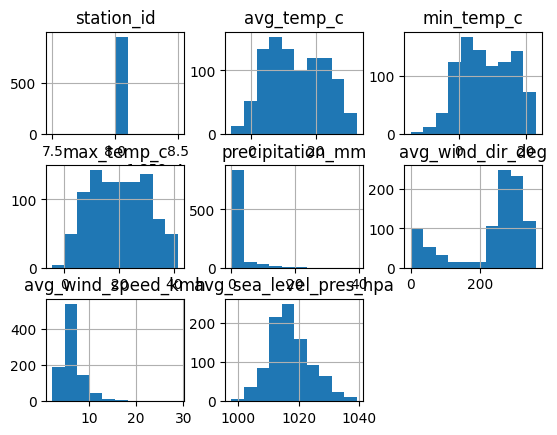

In [101]:
# Write your code here. Add as many boxes as you need.
data.hist()

<ipython-input-102-51377c7d9d9f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)


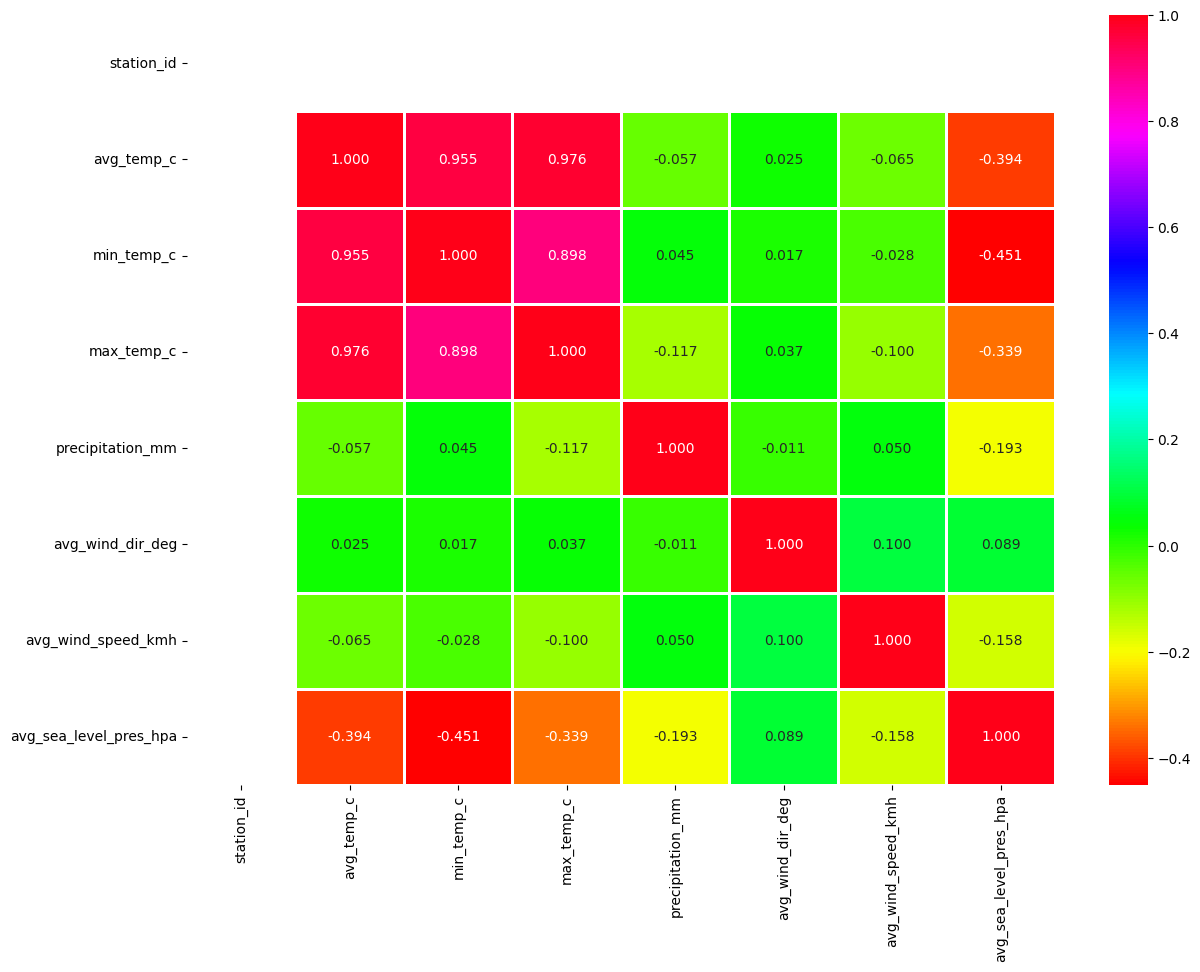

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

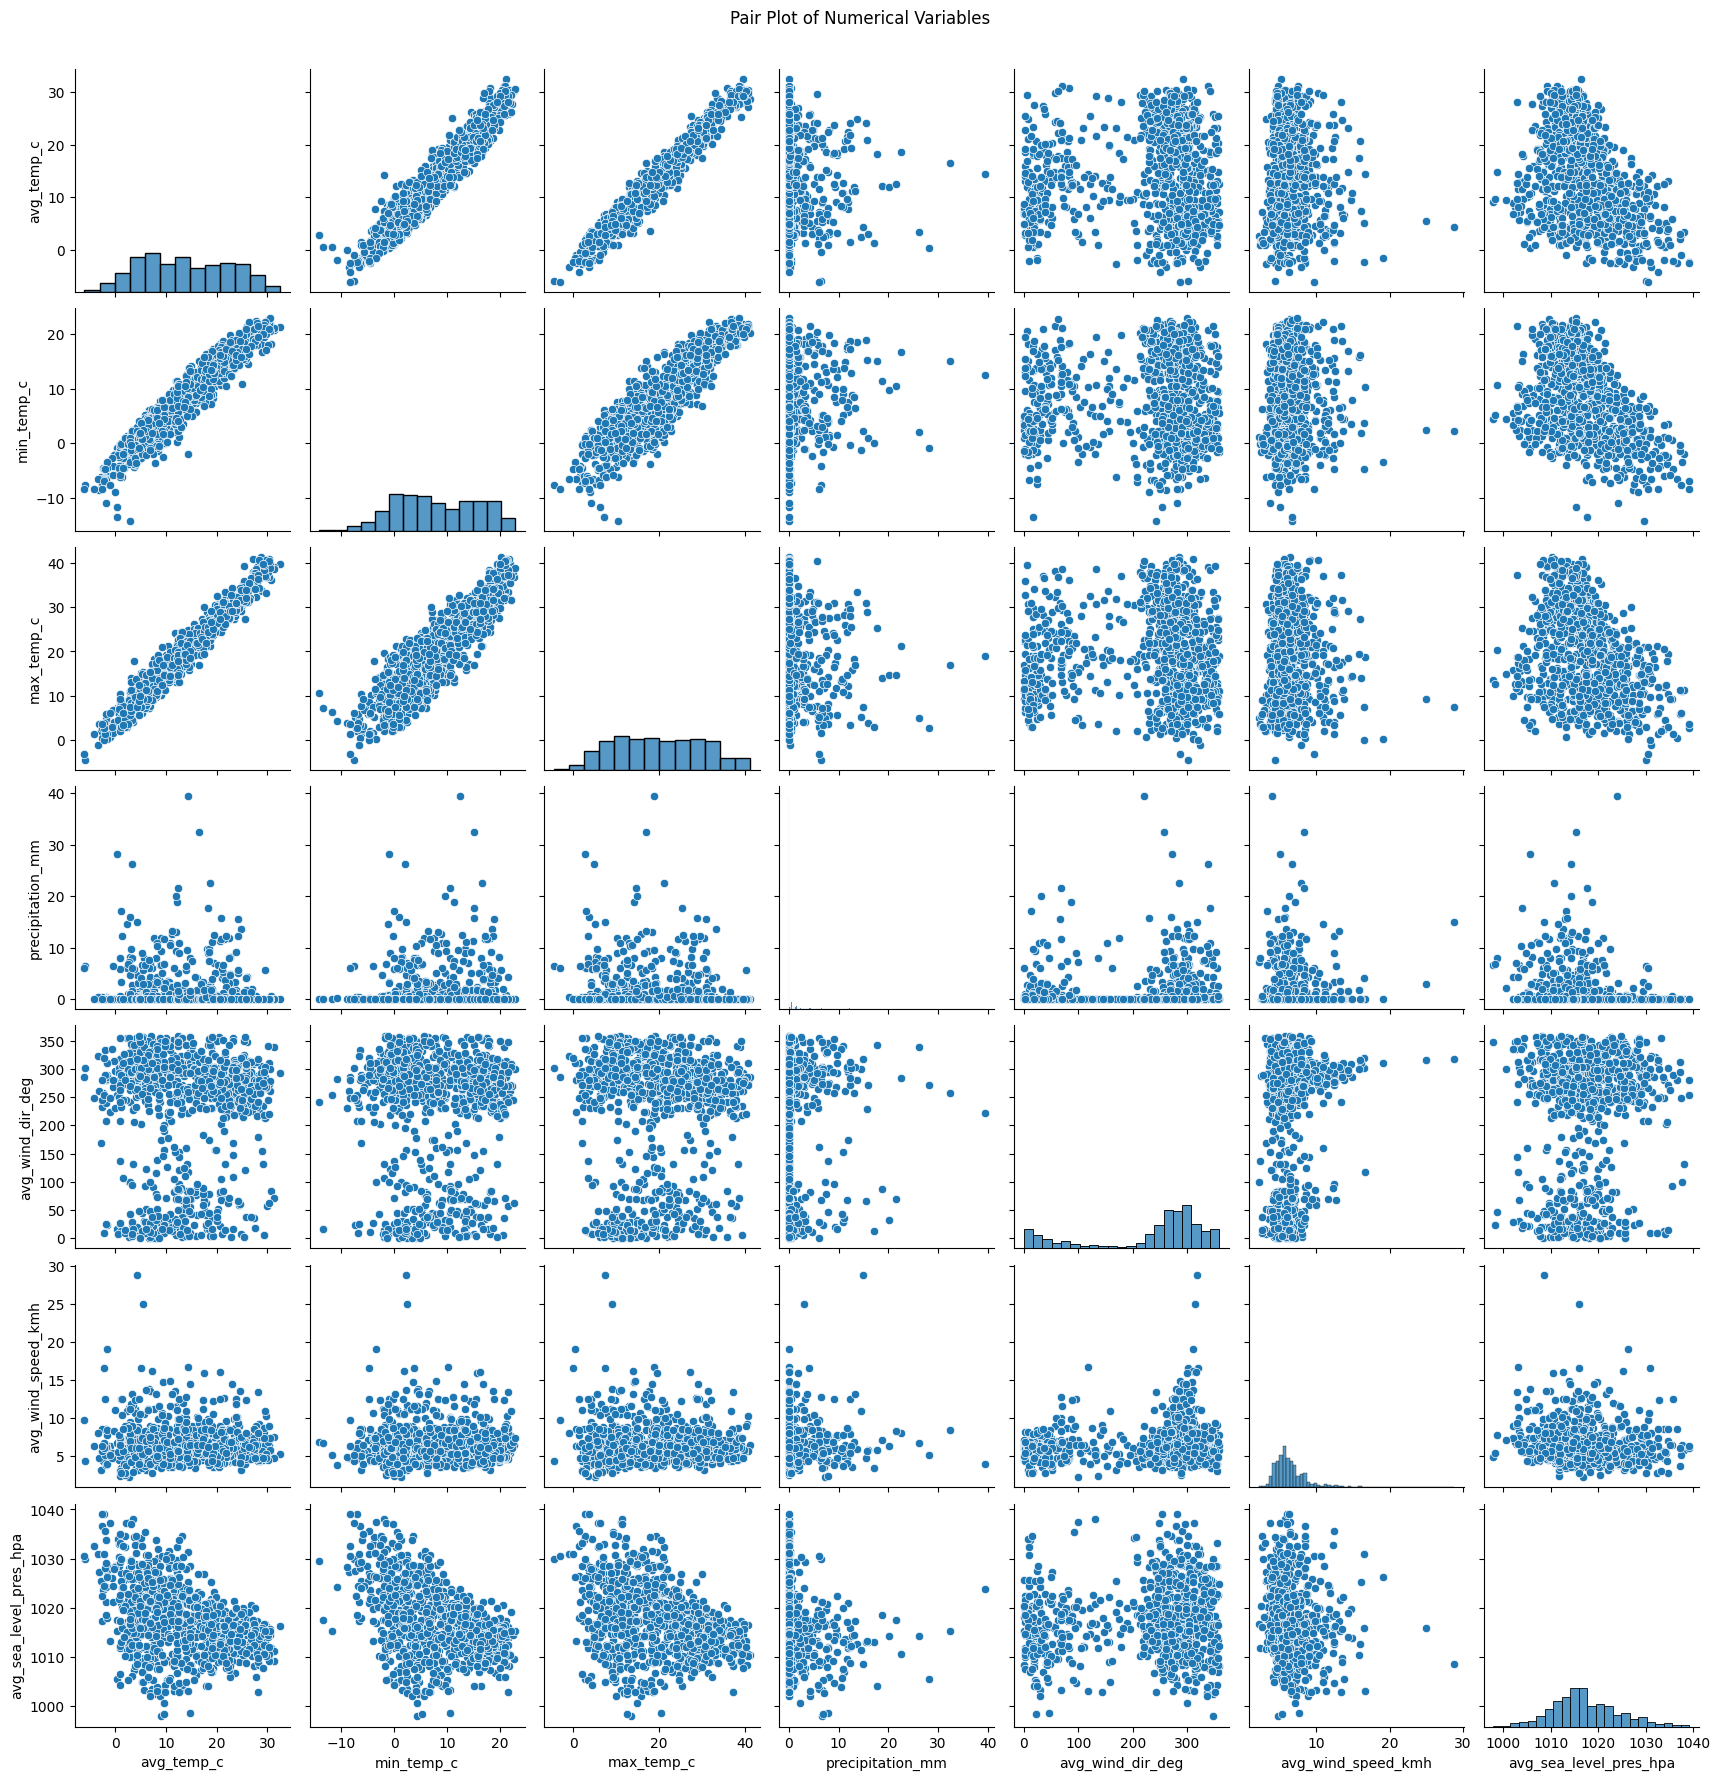

Pearson Correlation Coefficients:
                        avg_temp_c  min_temp_c  max_temp_c  precipitation_mm  \
avg_temp_c                1.000000    0.955178    0.976177         -0.056634   
min_temp_c                0.955178    1.000000    0.898194          0.045430   
max_temp_c                0.976177    0.898194    1.000000         -0.117093   
precipitation_mm         -0.056634    0.045430   -0.117093          1.000000   
avg_wind_dir_deg          0.025137    0.016872    0.037166         -0.011240   
avg_wind_speed_kmh       -0.065397   -0.028296   -0.099911          0.050021   
avg_sea_level_pres_hpa   -0.393837   -0.451426   -0.339306         -0.193343   

                        avg_wind_dir_deg  avg_wind_speed_kmh  \
avg_temp_c                      0.025137           -0.065397   
min_temp_c                      0.016872           -0.028296   
max_temp_c                      0.037166           -0.099911   
precipitation_mm               -0.011240            0.050021   
avg_w

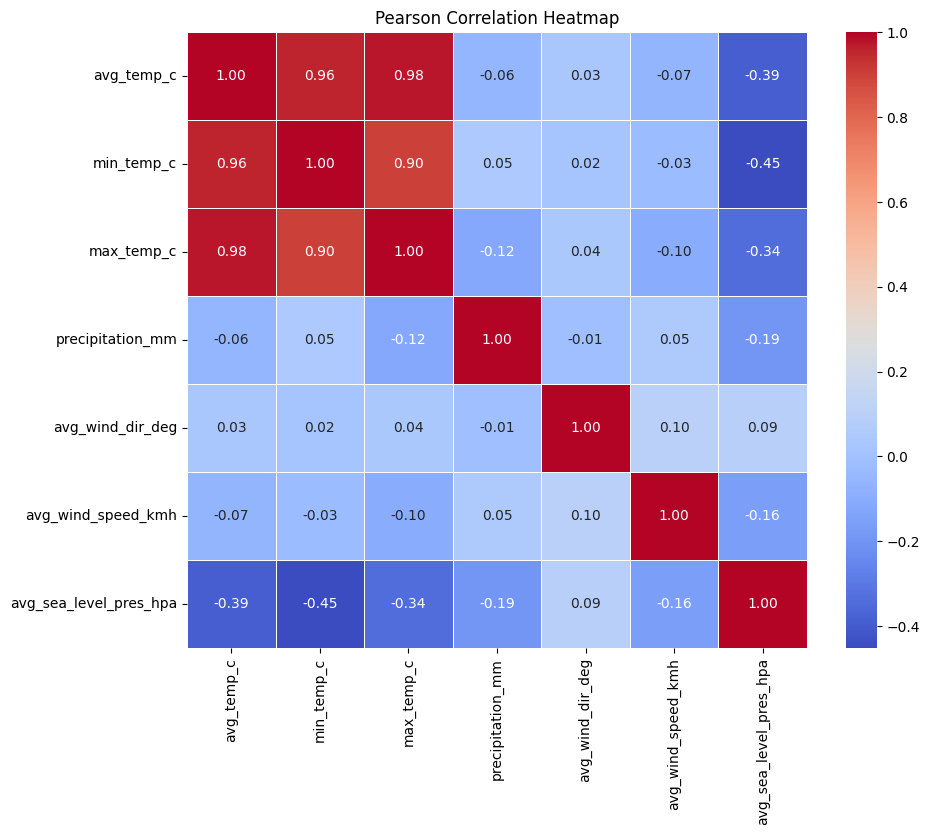

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Select numerical columns for analysis
numerical_columns = ['avg_temp_c', 'min_temp_c', 'max_temp_c', 'precipitation_mm',
                      'avg_wind_dir_deg', 'avg_wind_speed_kmh', 'avg_sea_level_pres_hpa']

# Create pair plots with scatter plots and histograms
sns.pairplot(data[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# Calculate and print Pearson correlation coefficients
correlation_matrix = data[numerical_columns].corr()

print('Pearson Correlation Coefficients:')
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [104]:
data

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,13588,Skopje,2021-01-01,Winter,5.1,0.5,13.2,0.0,330.0,5.9,1021.2
1,13588,Skopje,2021-01-02,Winter,3.0,-2.6,11.2,0.0,330.0,5.9,1021.2
2,13588,Skopje,2021-01-03,Winter,6.8,3.5,12.5,1.3,339.0,8.0,1017.8
3,13588,Skopje,2021-01-04,Winter,6.6,6.1,7.2,3.6,298.0,5.3,1011.3
4,13588,Skopje,2021-01-05,Winter,4.3,2.3,6.7,4.6,11.0,5.1,1014.5
...,...,...,...,...,...,...,...,...,...,...,...
938,13588,Skopje,2023-07-28,Summer,22.8,12.3,32.7,0.0,2.0,6.8,1014.6
939,13588,Skopje,2023-07-29,Summer,26.3,16.3,35.4,0.0,261.0,6.2,1011.7
940,13588,Skopje,2023-07-30,Summer,28.2,19.5,36.4,0.0,317.0,8.0,1009.8
941,13588,Skopje,2023-07-31,Summer,25.8,20.9,32.1,0.0,307.0,12.3,1010.9


Remove the highly correlated features.

In [105]:
# Write your code here. Add as many boxes as you need.
data.drop(["min_temp_c"], axis=1, inplace=True)

In [106]:
data.drop(["max_temp_c"], axis=1, inplace=True)

In [107]:
data

,station_id,city_name,date,season,avg_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,13588,Skopje,2021-01-01,Winter,5.1,0.0,330.0,5.9,1021.2
1,13588,Skopje,2021-01-02,Winter,3.0,0.0,330.0,5.9,1021.2
2,13588,Skopje,2021-01-03,Winter,6.8,1.3,339.0,8.0,1017.8
3,13588,Skopje,2021-01-04,Winter,6.6,3.6,298.0,5.3,1011.3
4,13588,Skopje,2021-01-05,Winter,4.3,4.6,11.0,5.1,1014.5
...,...,...,...,...,...,...,...,...,...
938,13588,Skopje,2023-07-28,Summer,22.8,0.0,2.0,6.8,1014.6
939,13588,Skopje,2023-07-29,Summer,26.3,0.0,261.0,6.2,1011.7
940,13588,Skopje,2023-07-30,Summer,28.2,0.0,317.0,8.0,1009.8
941,13588,Skopje,2023-07-31,Summer,25.8,0.0,307.0,12.3,1010.9


Encode the categorical features.

In [108]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns=['city_name', 'season']
for column in columns:
 data[column] = le.fit_transform(data[column])

In [109]:
columns = ['avg_temp_c', 'precipitation_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh', 'avg_sea_level_pres_hpa']
for column in columns:
    data[column] = data[column].astype(int)

# Feauture Extraction
Select the relevant features for prediction and apply a lag of one, two, and three days to each chosen feature (except `season`), creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [110]:
# Write your code here. Add as many boxes as you need.
columns = ['avg_temp_c', 'precipitation_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh']
for column in columns:
    data['Pred1den']=data[column].shift(1)

In [111]:
columns = ['avg_temp_c', 'precipitation_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh']
for column in columns:
      data['Pred2dena']=data[column].shift(2)

In [112]:
columns = ['avg_temp_c', 'precipitation_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh']
for column in columns:
      data['Pred3dena']=data[column].shift(3)

In [113]:
data

,station_id,city_name,date,season,avg_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa,Pred1den,Pred2dena,Pred3dena
0,13588,0,2021-01-01,3,5,0,330,5,1021,NaN,NaN,NaN
1,13588,0,2021-01-02,3,3,0,330,5,1021,5.0,NaN,NaN
2,13588,0,2021-01-03,3,6,1,339,8,1017,5.0,5.0,NaN
3,13588,0,2021-01-04,3,6,3,298,5,1011,8.0,5.0,5.0
4,13588,0,2021-01-05,3,4,4,11,5,1014,5.0,8.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
938,13588,0,2023-07-28,2,22,0,2,6,1014,16.0,13.0,4.0
939,13588,0,2023-07-29,2,26,0,261,6,1011,6.0,16.0,13.0
940,13588,0,2023-07-30,2,28,0,317,8,1009,6.0,6.0,16.0
941,13588,0,2023-07-31,2,25,0,307,12,1010,8.0,6.0,6.0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [114]:
data.dropna(axis=0, inplace=True)

In [115]:
data

,station_id,city_name,date,season,avg_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa,Pred1den,Pred2dena,Pred3dena
3,13588,0,2021-01-04,3,6,3,298,5,1011,8.0,5.0,5.0
4,13588,0,2021-01-05,3,4,4,11,5,1014,5.0,8.0,5.0
5,13588,0,2021-01-06,3,6,0,18,6,1017,5.0,5.0,8.0
6,13588,0,2021-01-07,3,7,0,0,4,1015,6.0,5.0,5.0
7,13588,0,2021-01-08,3,5,7,346,6,1009,4.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
938,13588,0,2023-07-28,2,22,0,2,6,1014,16.0,13.0,4.0
939,13588,0,2023-07-29,2,26,0,261,6,1011,6.0,16.0,13.0
940,13588,0,2023-07-30,2,28,0,317,8,1009,6.0,6.0,16.0
941,13588,0,2023-07-31,2,25,0,307,12,1010,8.0,6.0,6.0


In [131]:
t = data.copy()
t.drop('avg_sea_level_pres_hpa', axis='columns', inplace=True)
t['date']=le.fit_transform(t['date'])

In [132]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(t[t.columns], data['avg_sea_level_pres_hpa'], test_size=0.2)

In [133]:
X_train

,station_id,city_name,date,season,avg_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,Pred1den,Pred2dena,Pred3dena
478,13588,0,475,1,16,0,292,5,5.0,10.0,5.0
94,13588,0,91,1,9,0,276,5,6.0,7.0,4.0
184,13588,0,181,2,26,0,281,5,7.0,7.0,7.0
835,13588,0,832,1,12,0,259,6,8.0,11.0,6.0
461,13588,0,458,1,11,0,18,5,7.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
846,13588,0,843,1,11,13,304,13,10.0,6.0,6.0
140,13588,0,137,1,16,4,279,10,7.0,7.0,6.0
82,13588,0,79,1,3,0,295,11,11.0,5.0,2.0
882,13588,0,879,2,20,0,105,6,4.0,3.0,5.0


In [134]:
X_test

,station_id,city_name,date,season,avg_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,Pred1den,Pred2dena,Pred3dena
620,13588,0,617,0,17,0,293,7,7.0,6.0,6.0
119,13588,0,116,1,21,0,70,6,5.0,4.0,7.0
853,13588,0,850,1,14,9,324,4,9.0,12.0,8.0
572,13588,0,569,2,28,0,272,6,4.0,5.0,6.0
470,13588,0,467,1,15,0,340,6,5.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
941,13588,0,938,2,25,0,307,12,8.0,6.0,6.0
790,13588,0,787,1,9,3,38,5,4.0,6.0,13.0
190,13588,0,187,2,25,4,348,5,4.0,6.0,7.0
359,13588,0,356,3,3,0,25,7,7.0,6.0,5.0


In [135]:
Y_train

478    1010
94     1015
184    1012
835    1010
461    1004
       ... 
846    1017
140    1017
82     1017
882    1011
365    1023
Name: avg_sea_level_pres_hpa, Length: 752, dtype: int64

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [136]:
# Write your code here. Add as many boxes as you need.
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

Use the trained model to make predictions for the test set.

In [137]:
# Write your code here. Add as many boxes as you need.
y_pred = random_forest_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [138]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2: {r2}')

Mean Squared Error: 21.48471276595743
Mean Absolute Error: 3.4764893617021273
R2: 0.543193866385132


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [139]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor

In [141]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Use the trained model to make predictions for the test set.

In [142]:
# Write your code here. Add as many boxes as you need.
y_pred2 = model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [143]:
# Write your code here. Add as many boxes as you need.
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [144]:
r2_score(Y_test, y_pred)

0.543193866385132

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [147]:
# Write your code here. Add as many boxes as you need.
d = data.copy()
d.drop('avg_sea_level_pres_hpa', axis='columns', inplace=True)
d['date']=le.fit_transform(d['date'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(d[d.columns], data['avg_sea_level_pres_hpa'], test_size=0.2)

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [148]:
# Write your code here. Add as many boxes as you need.
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 150, 200],
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)

grid_search.fit(X_train, Y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_


y_pred = best_xgb_model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Hyperparameters: {'n_estimators': 50}
Mean Squared Error on Test Set: 22.32404071403707


## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [129]:
# Write your code here. Add as many boxes as you need.